In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def generate_acceleration_data(num_points: int, driving_condition: str = "normal") -> np.ndarray:
    """
    Generate realistic acceleration data for a normal car ride.
    
    Parameters:
        num_points (int): Number of data points to generate.
        driving_condition (str): Driving condition - "normal", "smooth", "bumpy", "urban", "highway".
        
    Returns:
        np.ndarray: Array of simulated acceleration values.
    """
    # Define base parameters for acceleration in g-force (1g = 9.81 m/s²)
    base_acceleration = 1.0  # Normal steady acceleration
    variability = 0.05        # Small random noise
    event_intensity = 0.2     # Intensity of special events (braking, bumps)

    # Adjust parameters based on driving conditions
    if driving_condition == "smooth":
        variability = 0.03
        event_intensity = 0.1
    elif driving_condition == "bumpy":
        variability = 0.1
        event_intensity = 0.3
    elif driving_condition == "urban":
        variability = 0.07
        event_intensity = 0.2
    elif driving_condition == "highway":
        variability = 0.02
        event_intensity = 0.1

    # Generate base acceleration with noise
    acceleration_data = np.random.normal(base_acceleration, variability, num_points)

    # Introduce special events like sudden braking or acceleration
    for i in range(0, num_points, int(num_points / 10)):
        if np.random.rand() > 0.5:
            # Simulate sudden deceleration or acceleration
            event_value = base_acceleration + (np.random.randn() * event_intensity)
            event_duration = int(num_points * 0.01)  # Duration of event (1% of data points)
            start_index = max(0, i - event_duration // 2)
            end_index = min(num_points, start_index + event_duration)
            acceleration_data[start_index:end_index] = event_value
    
    # Ensure values remain in a realistic range (0.9g to 1.2g)
    acceleration_data = np.clip(acceleration_data, 0.9, 1.2)

    # Optional: Plot the data for visualization
    plt.figure(figsize=(20, 4))
    plt.plot(acceleration_data, label=f"Acceleration Data ({driving_condition})")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (g)")
    plt.title("Simulated Car Ride Acceleration Data")
    plt.legend()
    plt.grid(True)
    plt.show()

    return acceleration_data

# Example usage


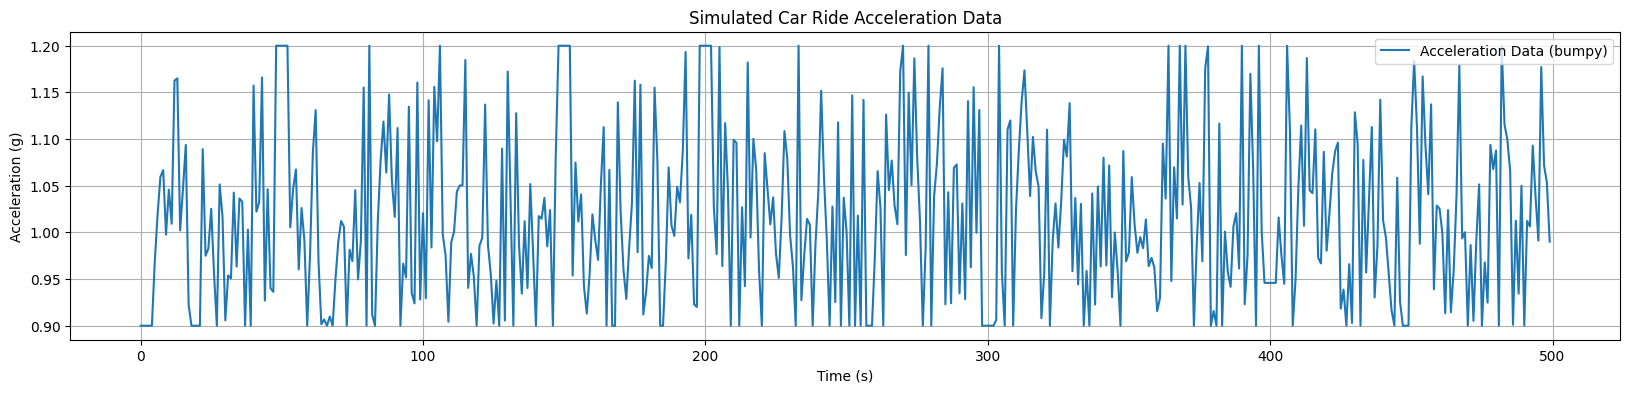

In [3]:
data = generate_acceleration_data(500, "bumpy")

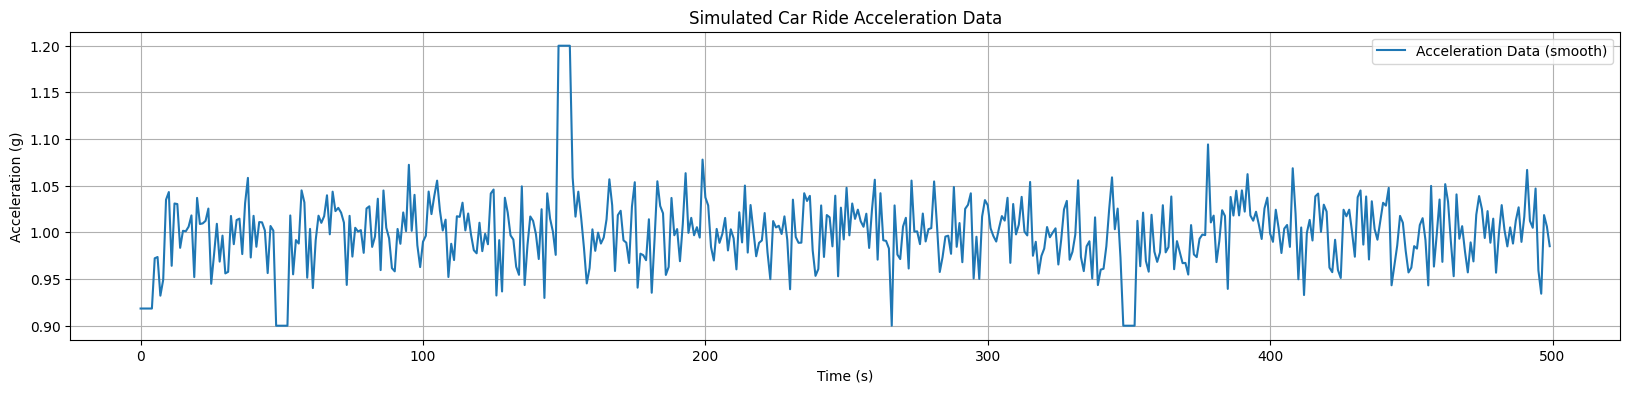

In [4]:
data = generate_acceleration_data(500, "smooth")

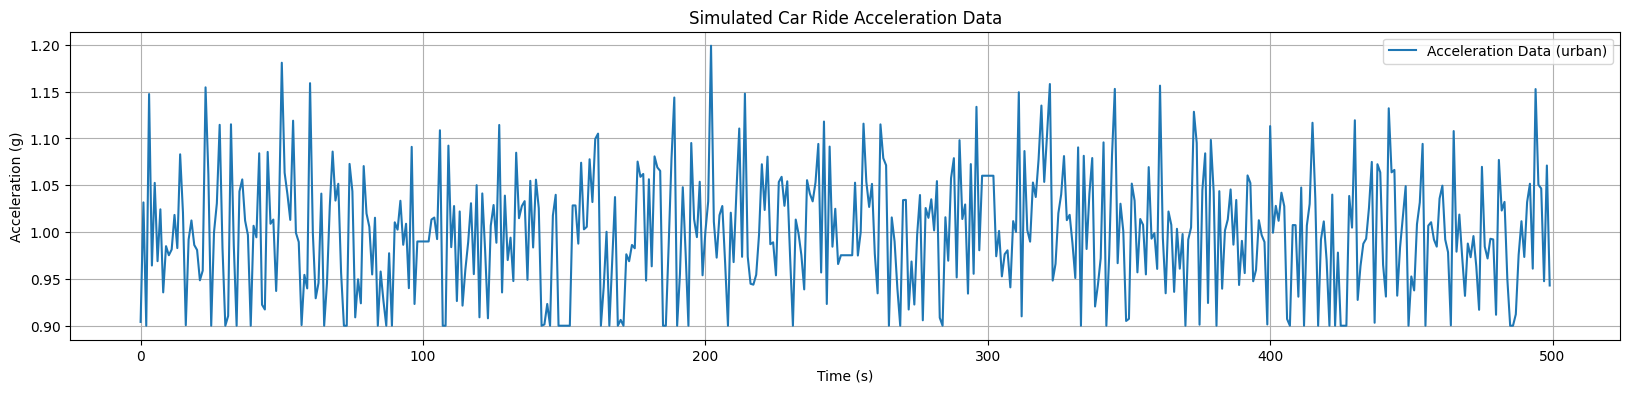

In [5]:
data = generate_acceleration_data(500, "urban")

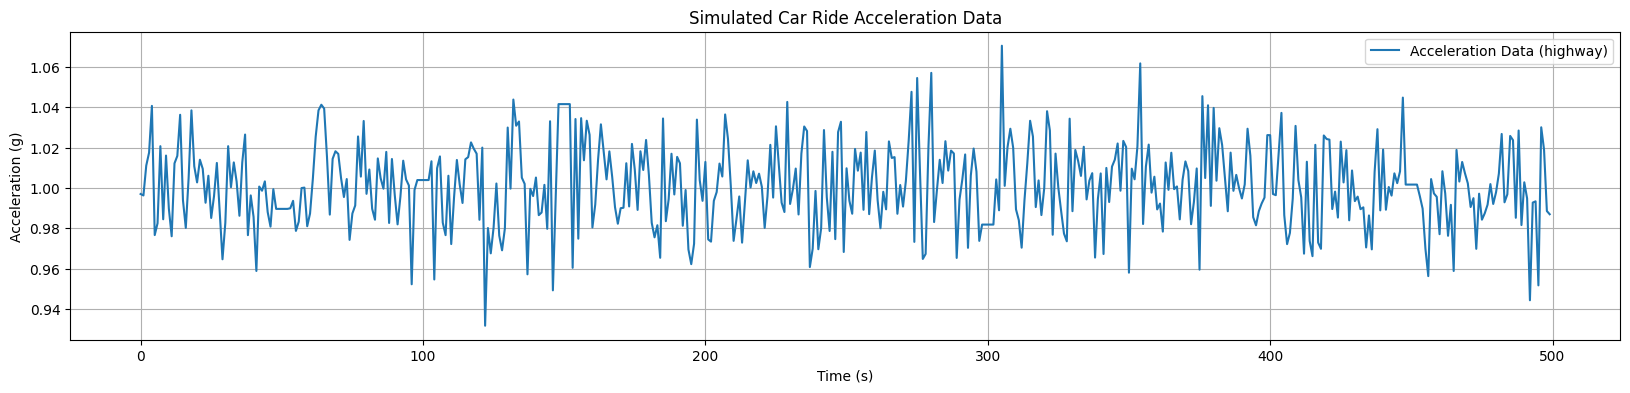

In [6]:
data = generate_acceleration_data(500, "highway")